**__PROJECT TOPIC_ : STRESS LEVEL PREDICTION BASED ON SLEEP HEALTH AND LIFESTYLE_**

In [75]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [76]:
#Loading The Dataset
df = pd.read_csv("dataset/Sleep_health_and_lifestyle_dataset.csv")

**Data Cleaning & Preprocessing**

Veri setinin sorunsuz yüklendiğine bakmak için ilk birkaç satıra bakıyoruz

In [77]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [78]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [79]:
df.shape

(374, 13)

In [80]:
df.columns.tolist()

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Tanımlayıcı istatiklere bakıyoruz

In [82]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [83]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

Boş sütun sayısını kontrol ediyorum

In [85]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Person ID sütunu model eğitimi sırasında işimize yaramayacağı için datasetinden çıkardım

In [86]:
df = df.drop('Person ID', axis=1)
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

Boş satırları olan Sleep Disorder kolonununun boş satırlarını Nothing ile doldurdum

In [87]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Nothing')
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Normal Weight ve Normal aynı şey oldugu için tek kategoride topladım

In [88]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [89]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

Blood Pressure kolonunu ikiye ayırdım veri tutarsızlığı olmaması için

In [90]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].astype(int)
df = df.drop('Blood Pressure', axis=1)
df.head(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Nothing,126,83


**EXPLORATORY DATA ANALYSIS – EDA**

In [91]:
df['Stress Level'].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

Stres seviyesi dağılımına bakıyoruz

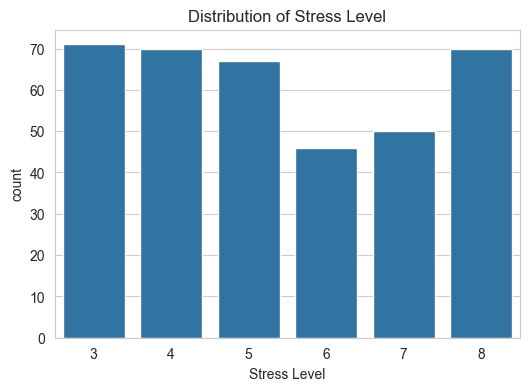

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stress Level', data=df)
plt.title("Distribution of Stress Level")
plt.show()


sayısal sütunların dağılımını gösteren histogram grafiği

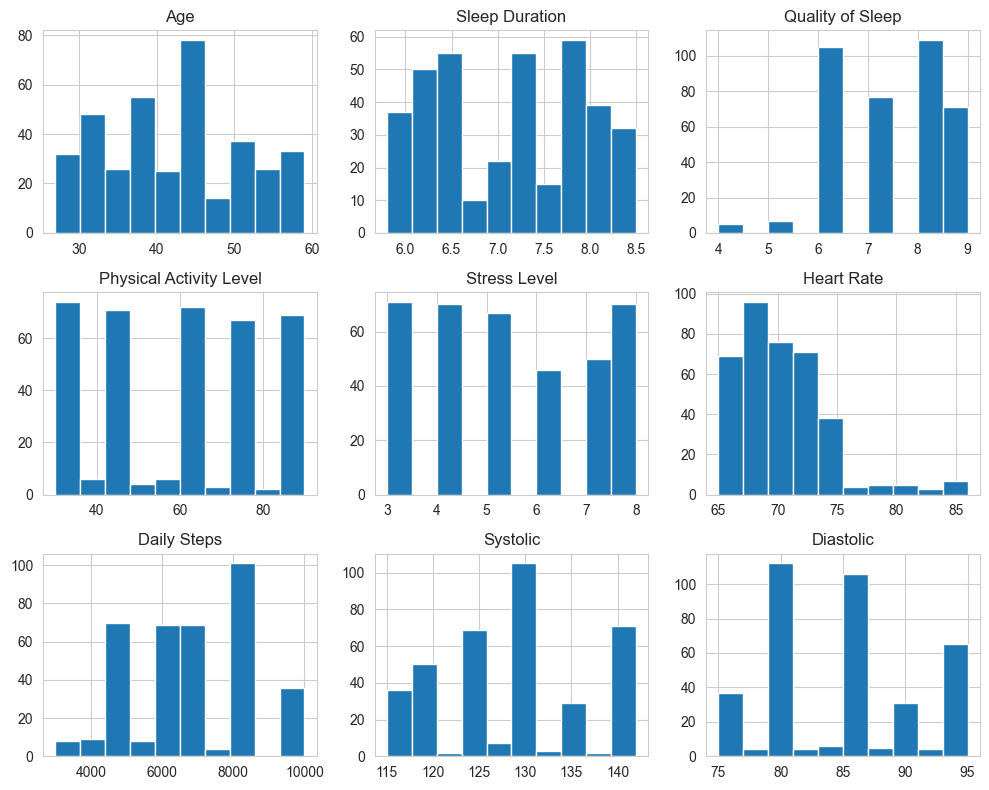

In [93]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

Numerik değişkenlerin hepsi için ayrı ayrı boxplot çizmi yaptım böylece değişkenlerin istatistiksel dağılımını ve aykırı değerleri görürüz

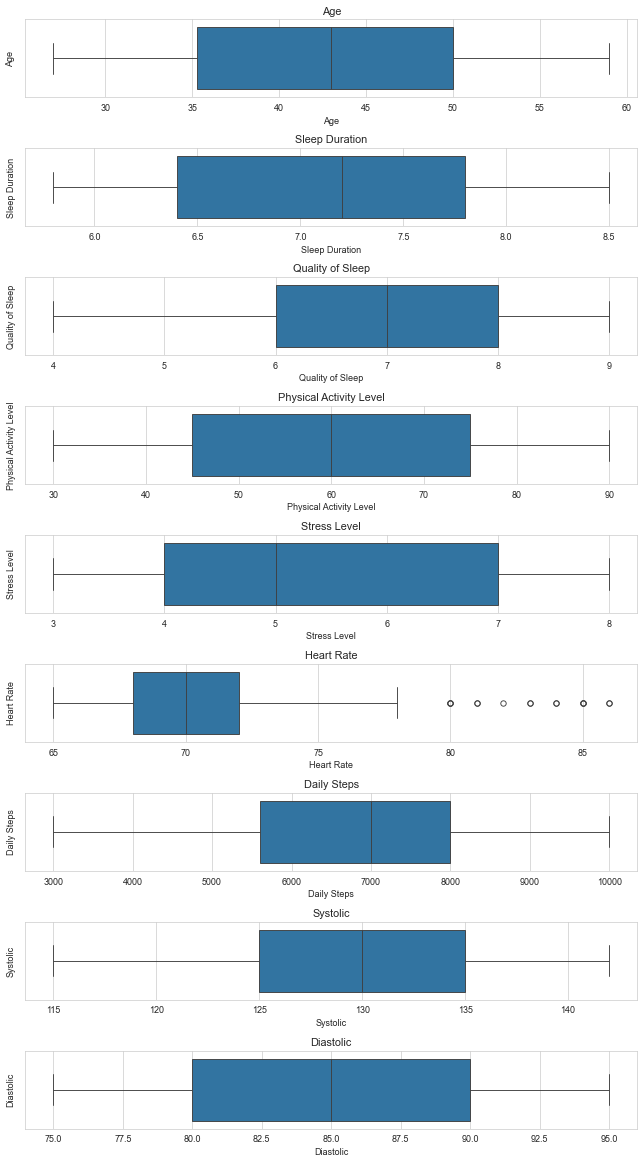

In [94]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axs = plt.subplots(len(num_cols), 1, figsize=(10, 2 * len(num_cols)), dpi=65)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

Aykırı değerleri baskılıyoruz

In [96]:
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
            if col != 'Stress Level']

In [97]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    outliers = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    print(f"{col}: {outliers}")

    df[col] = df[col].clip(lower_limit, upper_limit)


Age: 0
Sleep Duration: 0
Quality of Sleep: 0
Physical Activity Level: 0
Heart Rate: 15
Daily Steps: 0
Systolic: 0
Diastolic: 0


kategorik sütunların dağılımını gösteren countplot grafiği

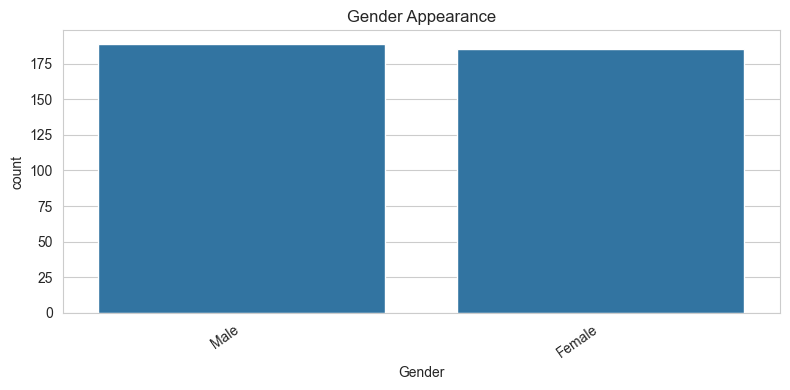

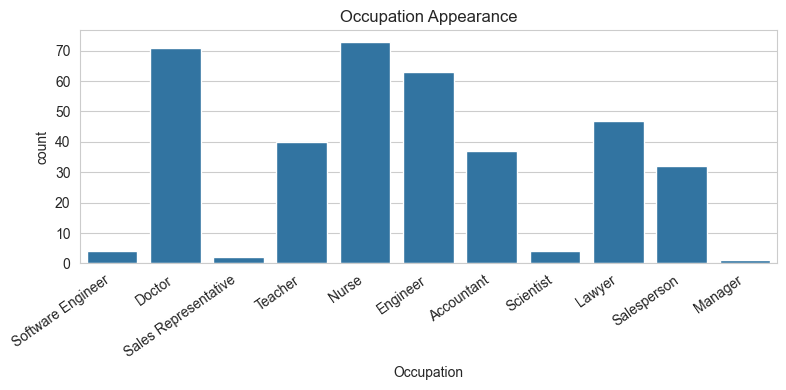

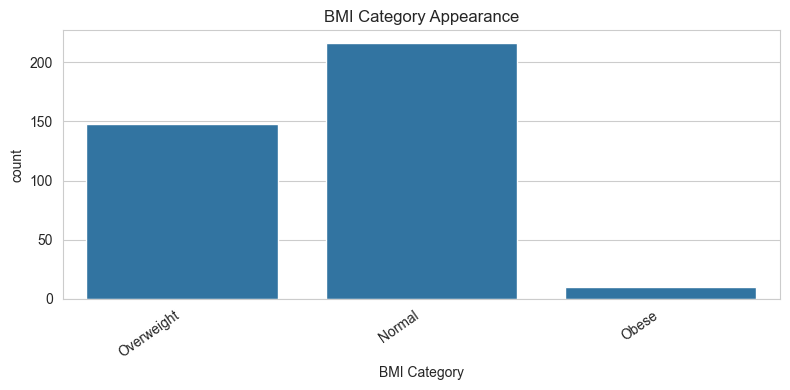

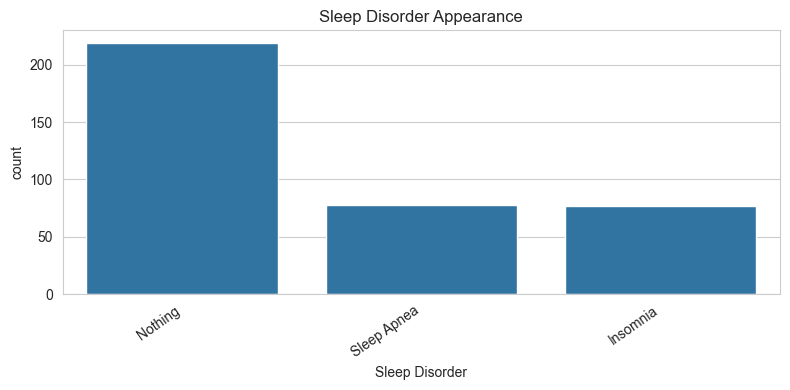

In [98]:
cat_cols=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"{col} Appearance")
    plt.xticks(rotation=35, ha='right')
    plt.tight_layout()
    plt.show()

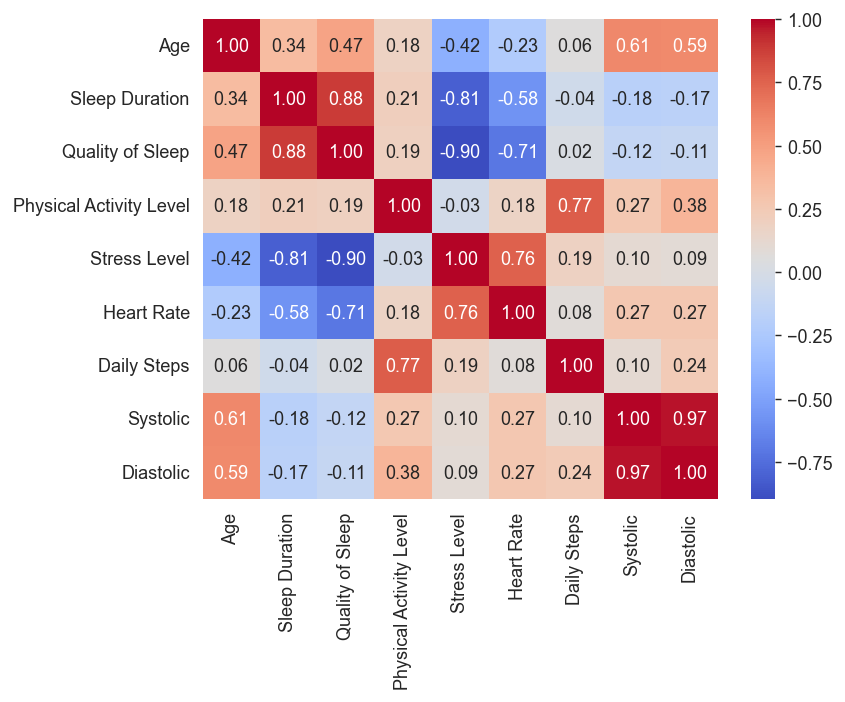

In [99]:
corr = df.corr(numeric_only=True)
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

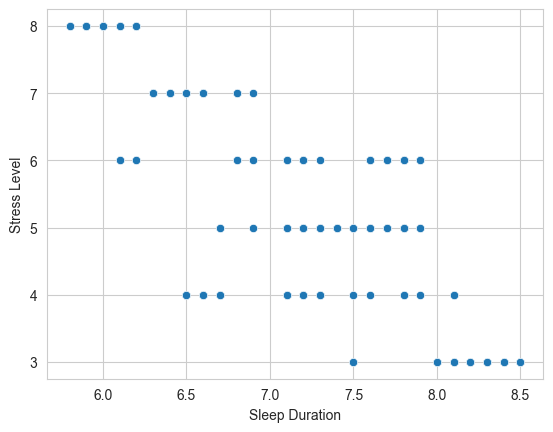

In [100]:
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level')


<Axes: xlabel='Quality of Sleep', ylabel='Stress Level'>

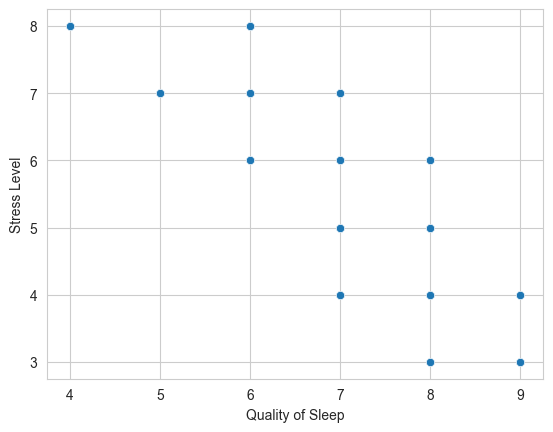

In [101]:
sns.scatterplot(data=df, x='Quality of Sleep', y='Stress Level')


<Axes: xlabel='Heart Rate', ylabel='Stress Level'>

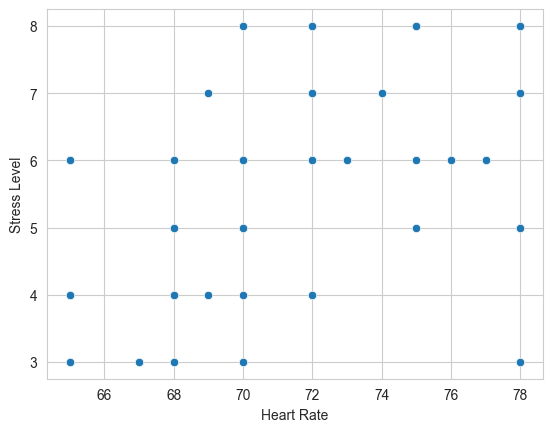

In [102]:
sns.scatterplot(data=df, x='Heart Rate', y='Stress Level')


<Axes: xlabel='Gender', ylabel='Stress Level'>

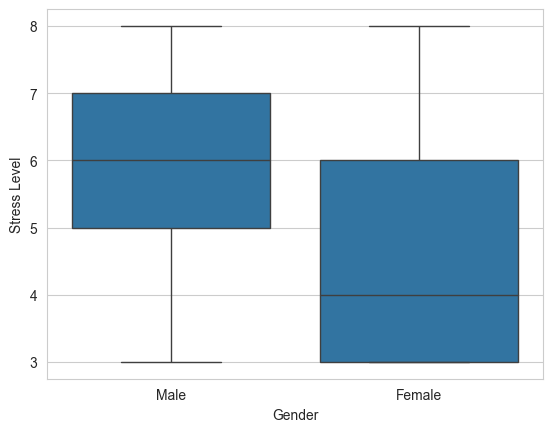

In [103]:
sns.boxplot(data=df, x='Gender', y='Stress Level')


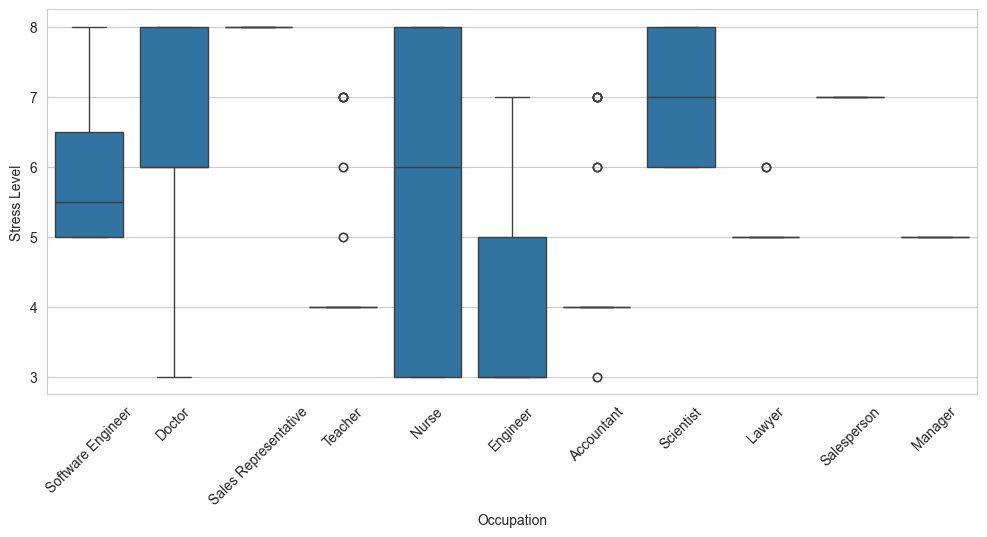

In [104]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Occupation', y='Stress Level')
plt.xticks(rotation=45)
plt.show()


**Feature Engineering & Selection**

Modelleme esnasında sıkıntı çıkmaması için encoding yaptım.Kategorik verileri sayısallaştırdım.

BMI Category için Label Encoding uyguladım

In [105]:
bmi_mapping = {
    "Normal": 0,
    "Overweight": 1,
    "Obese": 2
}

df["BMI Category"] = df["BMI Category"].map(bmi_mapping)


Kalan kategorik değişkenler için One-Hot Encoding uyguladım

In [106]:
categorical_cols = ["Gender", "Occupation", "Sleep Disorder"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [107]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Nothing,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,1,77,4200,126,83,...,False,False,False,False,False,False,True,False,True,False
1,28,6.2,6,60,8,0,75,10000,125,80,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,0,75,10000,125,80,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,4,30,8,2,78,3000,140,90,...,False,False,False,True,False,False,False,False,False,True
4,28,5.9,4,30,8,2,78,3000,140,90,...,False,False,False,True,False,False,False,False,False,True


**TRAIN - TEST**

In [108]:
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(299, 22)
(299,)
(75, 22)
(75,)


In [111]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
#1.Model : Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix : \n", cm)
cr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", cr)

Accuracy: 0.92
Confusion Matrix : 
 [[12  1  0  1  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 13  1  0  0]
 [ 0  1  1  7  0  0]
 [ 0  0  1  0  9  0]
 [ 0  0  0  0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       0.88      1.00      0.93        14
           5       0.87      0.93      0.90        14
           6       0.78      0.78      0.78         9
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        14

    accuracy                           0.92        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.93      0.92      0.92        75



In [114]:
#2.Model : Support Vector Mechanism (SVM)
svm_classifier = svm.SVC(kernel='linear', C=1  )
svm_classifier.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [115]:
y_pred_svm = svm_classifier.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix :\n", cm)
cr = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", cr)


Accuracy: 0.9733333333333334
Confusion Matrix :
 [[14  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0  8  0  0]
 [ 0  0  1  0  9  0]
 [ 0  0  0  0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        14
           4       0.93      1.00      0.97        14
           5       0.93      1.00      0.97        14
           6       1.00      0.89      0.94         9
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        14

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.98      0.97      0.97        75



In [117]:
#3.Model : KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [118]:
knn.score(X_test,y_test)

0.92

In [119]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix :\n", cm)
cr = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", cr)


Accuracy: 0.92
Confusion Matrix :
 [[12  2  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  1 13  0  0  0]
 [ 0  1  1  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  1  0 13]]
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       0.78      1.00      0.88        14
           5       0.93      0.93      0.93        14
           6       0.88      0.78      0.82         9
           7       1.00      1.00      1.00        10
           8       1.00      0.93      0.96        14

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75



In [120]:
#4.Model : Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100,max_depth = 5,random_state=42)
random_forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
random_forest.score(X_test,y_test)

0.9733333333333334

In [122]:
y_pred_rf = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix :\n", cm)
cr = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", cr)

Accuracy: 0.9733333333333334
Confusion Matrix :
 [[13  0  0  1  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14
           6       0.89      0.89      0.89         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [123]:
#The Best Model : Random Forest Classifier
results = pd.DataFrame({
    "Model": ["Logistic", "SVM", "KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print(results)


           Model  Accuracy
0       Logistic  0.920000
1            SVM  0.973333
2            KNN  0.920000
3  Random Forest  0.973333


In [124]:
#KFold cross validation
from sklearn.model_selection import KFold, cross_val_score

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(random_forest, X, y, cv=kfold, scoring="accuracy")

print("KFold scores:", scores)
print("KFold mean:", scores.mean())


KFold scores: [0.97333333 0.92       0.94666667 0.98666667 0.93243243]
KFold mean: 0.9518198198198199


In [125]:
#Feature Importances
random_forest.fit(X_train, y_train)
importances = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)
print(importances)


Sleep Duration                     0.184209
Quality of Sleep                   0.177637
Heart Rate                         0.109802
Age                                0.099497
Daily Steps                        0.070047
Systolic                           0.069727
Physical Activity Level            0.062836
Diastolic                          0.049479
Occupation_Lawyer                  0.038450
Occupation_Salesperson             0.038158
Gender_Male                        0.030045
Occupation_Doctor                  0.024873
BMI Category                       0.008384
Occupation_Teacher                 0.007902
Sleep Disorder_Nothing             0.007545
Occupation_Engineer                0.006726
Occupation_Nurse                   0.006566
Sleep Disorder_Sleep Apnea         0.004729
Occupation_Scientist               0.002057
Occupation_Software Engineer       0.001272
Occupation_Sales Representative    0.000059
Occupation_Manager                 0.000000
dtype: float64


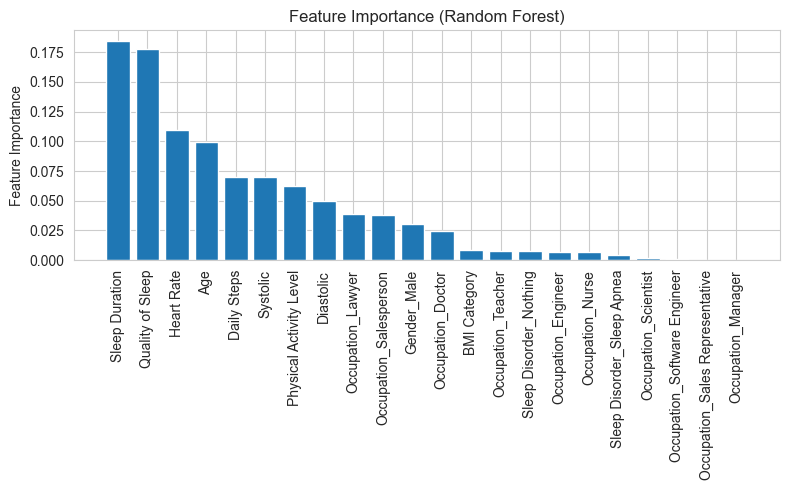

In [126]:
plt.figure(figsize=(8, 5))
plt.bar(importances.index, importances.values)
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [128]:
#model karşılaştırma tablosu
model_comparison = pd.DataFrame({
    "Model": [ "Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1-score (weighted)": [
        f1_score(y_test, y_pred_lr, average="weighted"),
        f1_score(y_test, y_pred_svm, average="weighted"),
        f1_score(y_test, y_pred_knn, average="weighted"),
        f1_score(y_test, y_pred_rf, average="weighted")
    ]
})

model_comparison.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1-score (weighted)
1,Support Vector Machine,0.973333,0.973050
3,Random Forest,0.973333,0.973316
0,Logistic Regression,0.920000,0.920202
2,K-Nearest Neighbors,0.920000,0.920884


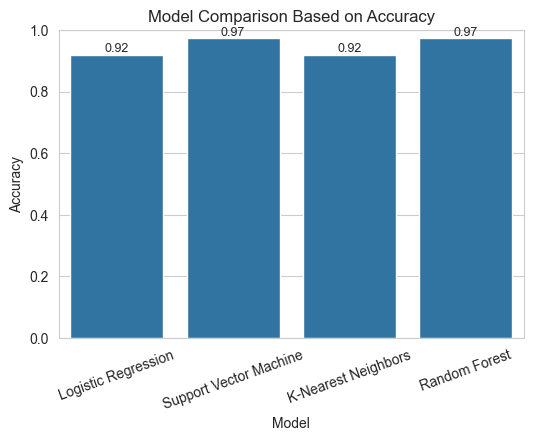

In [129]:
plt.figure(figsize=(6,4))

ax = sns.barplot(
    data=model_comparison,
    x="Model",
    y="Accuracy"
)

plt.title("Model Comparison Based on Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV( estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_


y_pred_final = best_rf.predict(X_test)

final_model_name = "Optimized Random Forest"
print(f"{final_model_name} Test Accuracy: {accuracy_score(y_test, y_pred_final):.2%}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9598305084745762
Optimized Random Forest Test Accuracy: 100.00%


In [58]:
#best model (random forest)
y_pred_final = y_pred_best_rf
final_model_name = "Optimized Random Forest"

In [59]:
test_acc = accuracy_score(y_test, y_pred_final)
print(f"{final_model_name} Test Accuracy: {test_acc:.2%}")

Optimized Random Forest Test Accuracy: 100.00%


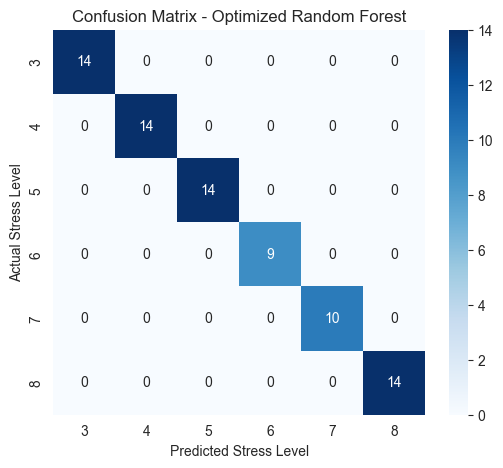

In [60]:
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred_final, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix - {final_model_name}")
plt.xlabel("Predicted Stress Level")
plt.ylabel("Actual Stress Level")
plt.show()

In [61]:
print(f"Classification Report - {final_model_name}:\n")
print(classification_report(y_test, y_pred_final))

Classification Report - Optimized Random Forest:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [62]:
#erroranalysis

X_test_df = pd.DataFrame(X_test, columns=X.columns)

error_df = pd.DataFrame({"Actual Stress Level": y_test.values,
    "Predicted Stress Level": y_pred_final}).join(X_test_df)

error_df["Prediction Result"] = (error_df["Actual Stress Level"] == error_df["Predicted Stress Level"])

error_df.head()

,Actual Stress Level,Predicted Stress Level,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Systolic,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Nothing,Sleep Disorder_Sleep Apnea,Prediction Result
0,4,4,-0.620584,0.070401,0.563661,0.009969,-0.825002,-0.570433,0.104445,-1.74553,...,-0.057928,-0.501045,-0.082061,-0.308607,-0.100673,-0.116445,-0.327731,0.847579,-0.527046,True
1,3,3,1.918099,1.323363,1.397991,0.731112,0.975550,-0.570433,0.104445,1.46585,...,-0.057928,1.995829,-0.082061,-0.308607,-0.100673,-0.116445,-0.327731,-1.179830,1.897367,True
2,8,8,0.879547,-1.307859,-1.104999,1.452256,0.975550,1.377229,1.927160,1.46585,...,-0.057928,1.995829,-0.082061,-0.308607,-0.100673,-0.116445,-0.327731,-1.179830,1.897367,True
3,8,8,0.879547,-1.307859,-1.104999,1.452256,0.975550,1.377229,1.927160,1.46585,...,-0.057928,1.995829,-0.082061,-0.308607,-0.100673,-0.116445,-0.327731,-1.179830,1.897367,True
4,3,3,1.802705,1.072771,1.397991,0.731112,0.975550,-0.570433,0.104445,1.46585,...,-0.057928,1.995829,-0.082061,-0.308607,-0.100673,-0.116445,-0.327731,-1.179830,1.897367,True


In [63]:
misclassified = error_df[error_df["Prediction Result"] == False].copy()

print("Number of misclassified samples:", len(misclassified))

misclassified[[
    "Actual Stress Level",
    "Predicted Stress Level",
    "Sleep Duration",
    "Quality of Sleep",
    "Heart Rate"
]].head(10)

Number of misclassified samples: 0


,Actual Stress Level,Predicted Stress Level,Sleep Duration,Quality of Sleep,Heart Rate


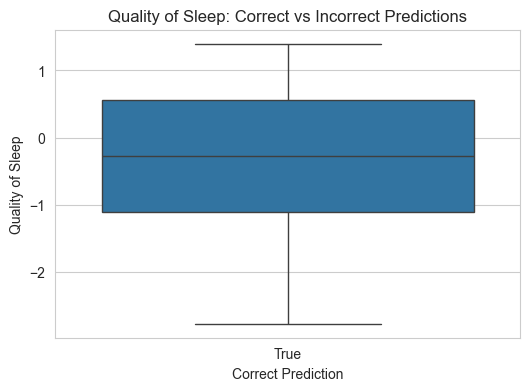

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(data=error_df, x="Prediction Result", y="Quality of Sleep")
plt.xlabel("Correct Prediction")
plt.ylabel("Quality of Sleep")
plt.title("Quality of Sleep: Correct vs Incorrect Predictions")
plt.show()

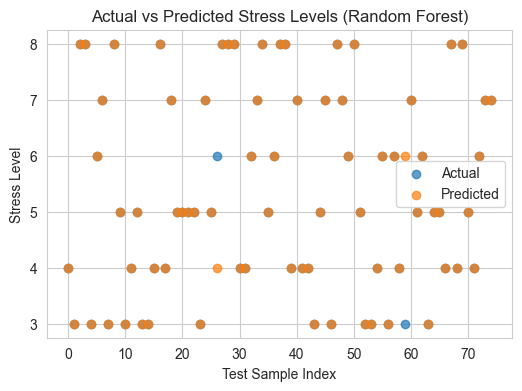

In [65]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label="Predicted", alpha=0.7)
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Stress Level")
plt.title("Actual vs Predicted Stress Levels (Random Forest)")
plt.show()